<a href="https://colab.research.google.com/github/JANEADT110/Data_analysis_sqlite/blob/main/StudentTime_Database_Creat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

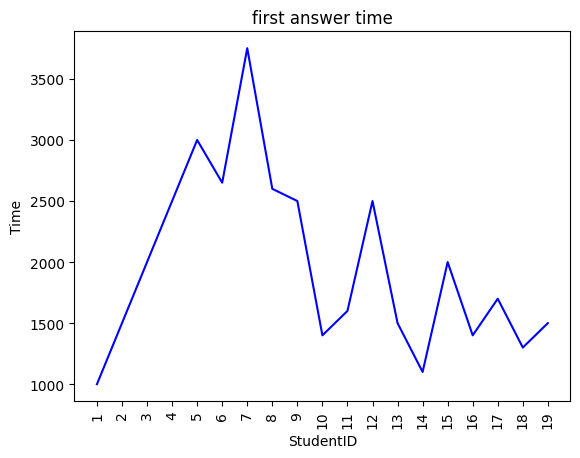

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import io

# 載入資料
# from google.colab import files
# uploaded = files.upload()

# 讀取CSV檔案
data =  pd.read_csv(io.BytesIO(uploaded['Student_time_analyze.csv']))

# 繪製折線圖
plt.plot(data.student_ID, data.start_TIME, color='b')
plt.xlabel('StudentID')
plt.ylabel('Time')
plt.xticks(data.student_ID, rotation='vertical')
plt.title('first answer time')

# 將圖片儲存為二進位數據
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image_binary = buf.read()

# 連接到SQLite資料庫
conn = sqlite3.connect('Data.db')
cursor = conn.cursor()

# 創建包含二進位欄位的表格
cursor.execute('''CREATE TABLE IF NOT EXISTS Images
                  (id INTEGER PRIMARY KEY,
                  image BLOB)''')

# 插入二進位數據
cursor.execute('INSERT INTO Images (image) VALUES (?)', (sqlite3.Binary(image_binary),))
conn.commit()

# 關閉資料庫連接
conn.close()

# 顯示折線圖
plt.show()

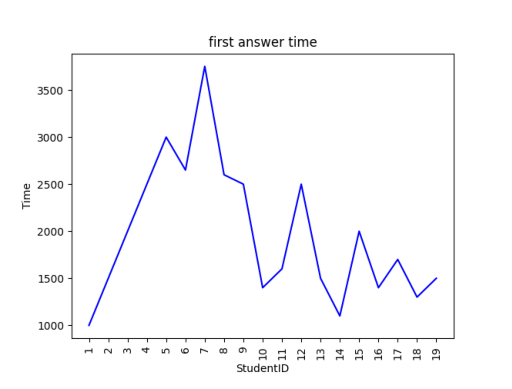

In [ ]:
import matplotlib.pyplot as plt
import sqlite3
import io

# 連接到SQLite資料庫
conn = sqlite3.connect('Data.db')
cursor = conn.cursor()

# 執行查詢，擷取圖片的二進位數據
cursor.execute('SELECT image FROM Images WHERE id = ?', (1,))
image_binary = cursor.fetchone()[0]

# 將二進位數據轉換為圖片
buf = io.BytesIO(image_binary)
buf.seek(0)
image = plt.imread(buf)

# 關閉資料庫連接
conn.close()

# 顯示圖片
plt.imshow(image)
plt.axis('off')  # 隱藏坐標軸
plt.show()

In [ ]:
!pip install mysql-connector-python

In [ ]:
import mysql.connector
mydb = mysql.connector.connect(
host="localhost",
user="id21977130_root",
password="Qa@12345",
database="id21977130_localhost"
)

DatabaseError: 2003 (HY000): Can't connect to MySQL server on 'localhost:3306' (99)